In [1]:
import os
try:
    import scienceplots
    plt.style.use(['science', 'ieee', 'notebook', 'no-latex'])
except:pass
import sys
sys.path.append(os.path.dirname(os.getcwd()))

# Récupérer le `bbox`du projet
La bounding box `bbox` est une boîte englobante définie par des coordonnées géographiques qui délimitent une zone rectangulaire sur une carte. Elle est couramment utilisée pour spécifier une région d'intérêt et faciliter le traitement géospatial de cette zone.

- Dessiner un rectangle sur la carte
- Cliquer sur le rectangle
- Copier/Coller la chaine de caractère qui s'affiche dans une variable python `bbox_str` 
```
{"type":"Feature","properties":{},"geometry":{"type":"Polygon","coordinates":[[[-1.167492,46.170665],[-1.167492,46.179228],[-1.144669,46.179228],[-1.144669,46.170665],[-1.167492,46.170665]]]}}
```

In [3]:
from pymdu.commons.BasicFunctions import draw_bbox_with_folium
draw_bbox_with_folium(lat=46.160329,
                      lon=-1.151139,
                      zoom_start=13)

Output()

In [4]:
geojson_dict = {"type":"Feature","properties":{},"geometry":{"type":"Polygon","coordinates":[[[-1.155502,46.179057],[-1.155502,46.186278],[-1.14362,46.186278],[-1.14362,46.179057],[-1.155502,46.179057]]]}}

In [5]:
# Extraire les coordonnées du polygone
coordinates = geojson_dict['geometry']['coordinates'][0]
# Calculer les valeurs min et max
minx = min([point[0] for point in coordinates])  # Minimum des longitudes (x)
miny = min([point[1] for point in coordinates])  # Minimum des latitudes (y)
maxx = max([point[0] for point in coordinates])  # Maximum des longitudes (x)
maxy = max([point[1] for point in coordinates])  # Maximum des latitudes (y)
# Créer la liste [minx, miny, maxx, maxy]
bbox_coords = [minx, miny, maxx, maxy]

In [6]:
bbox_coords

[-1.155502, 46.179057, -1.14362, 46.186278]

# Télécharger des données

## La BDTOPO

## L'occupation du sol avec COSIA
https://cosia.ign.fr/info#export

Pré-requis : avoir téléchargé les données `.gpkg` du département adéquat

In [20]:
import os
from pymdu.commons.BasicFunctions import extract_coordinates_from_filenames, get_intersection_with_bbox, \
    get_intersection_with_bbox_and_attributes

directory_path = os.path.join("D:\\CoSIA_D017_2021\\CoSIA_D017_2021")
gdf_coordinates = extract_coordinates_from_filenames(directory_path)
intersection_gdf = get_intersection_with_bbox(gdf_coordinates, bbox_coords)
cosia = get_intersection_with_bbox_and_attributes(gdf_coordinates, bbox_coords, directory_path)


In [41]:
table_color_cosia = {"Bâtiment" : "#ce7079",
"Zone imperméable" :"#a6aab7",
"Zone perméable":"#987752",
"Piscine":"#62d0ff",
"Serre":"#b9e2d4",
"Sol nu":"#bbb096",
"Surface eau":"#3375a1",
"Neige":"#e9effe",
"Conifère":"#216e2e",
"Feuillu":"#4c9129",
"Coupe": "#e48e4d",
"Broussaille":"#b5c335",
"Pelouse": "#8cd76a",
"Culture":"#decf55",
"Terre labourée":"#d0a349",
"Vigne":"#b08290",
"Autre":"#222222"}

In [44]:
cosia['color'] = [table_color_cosia[x] for x in cosia.classe]

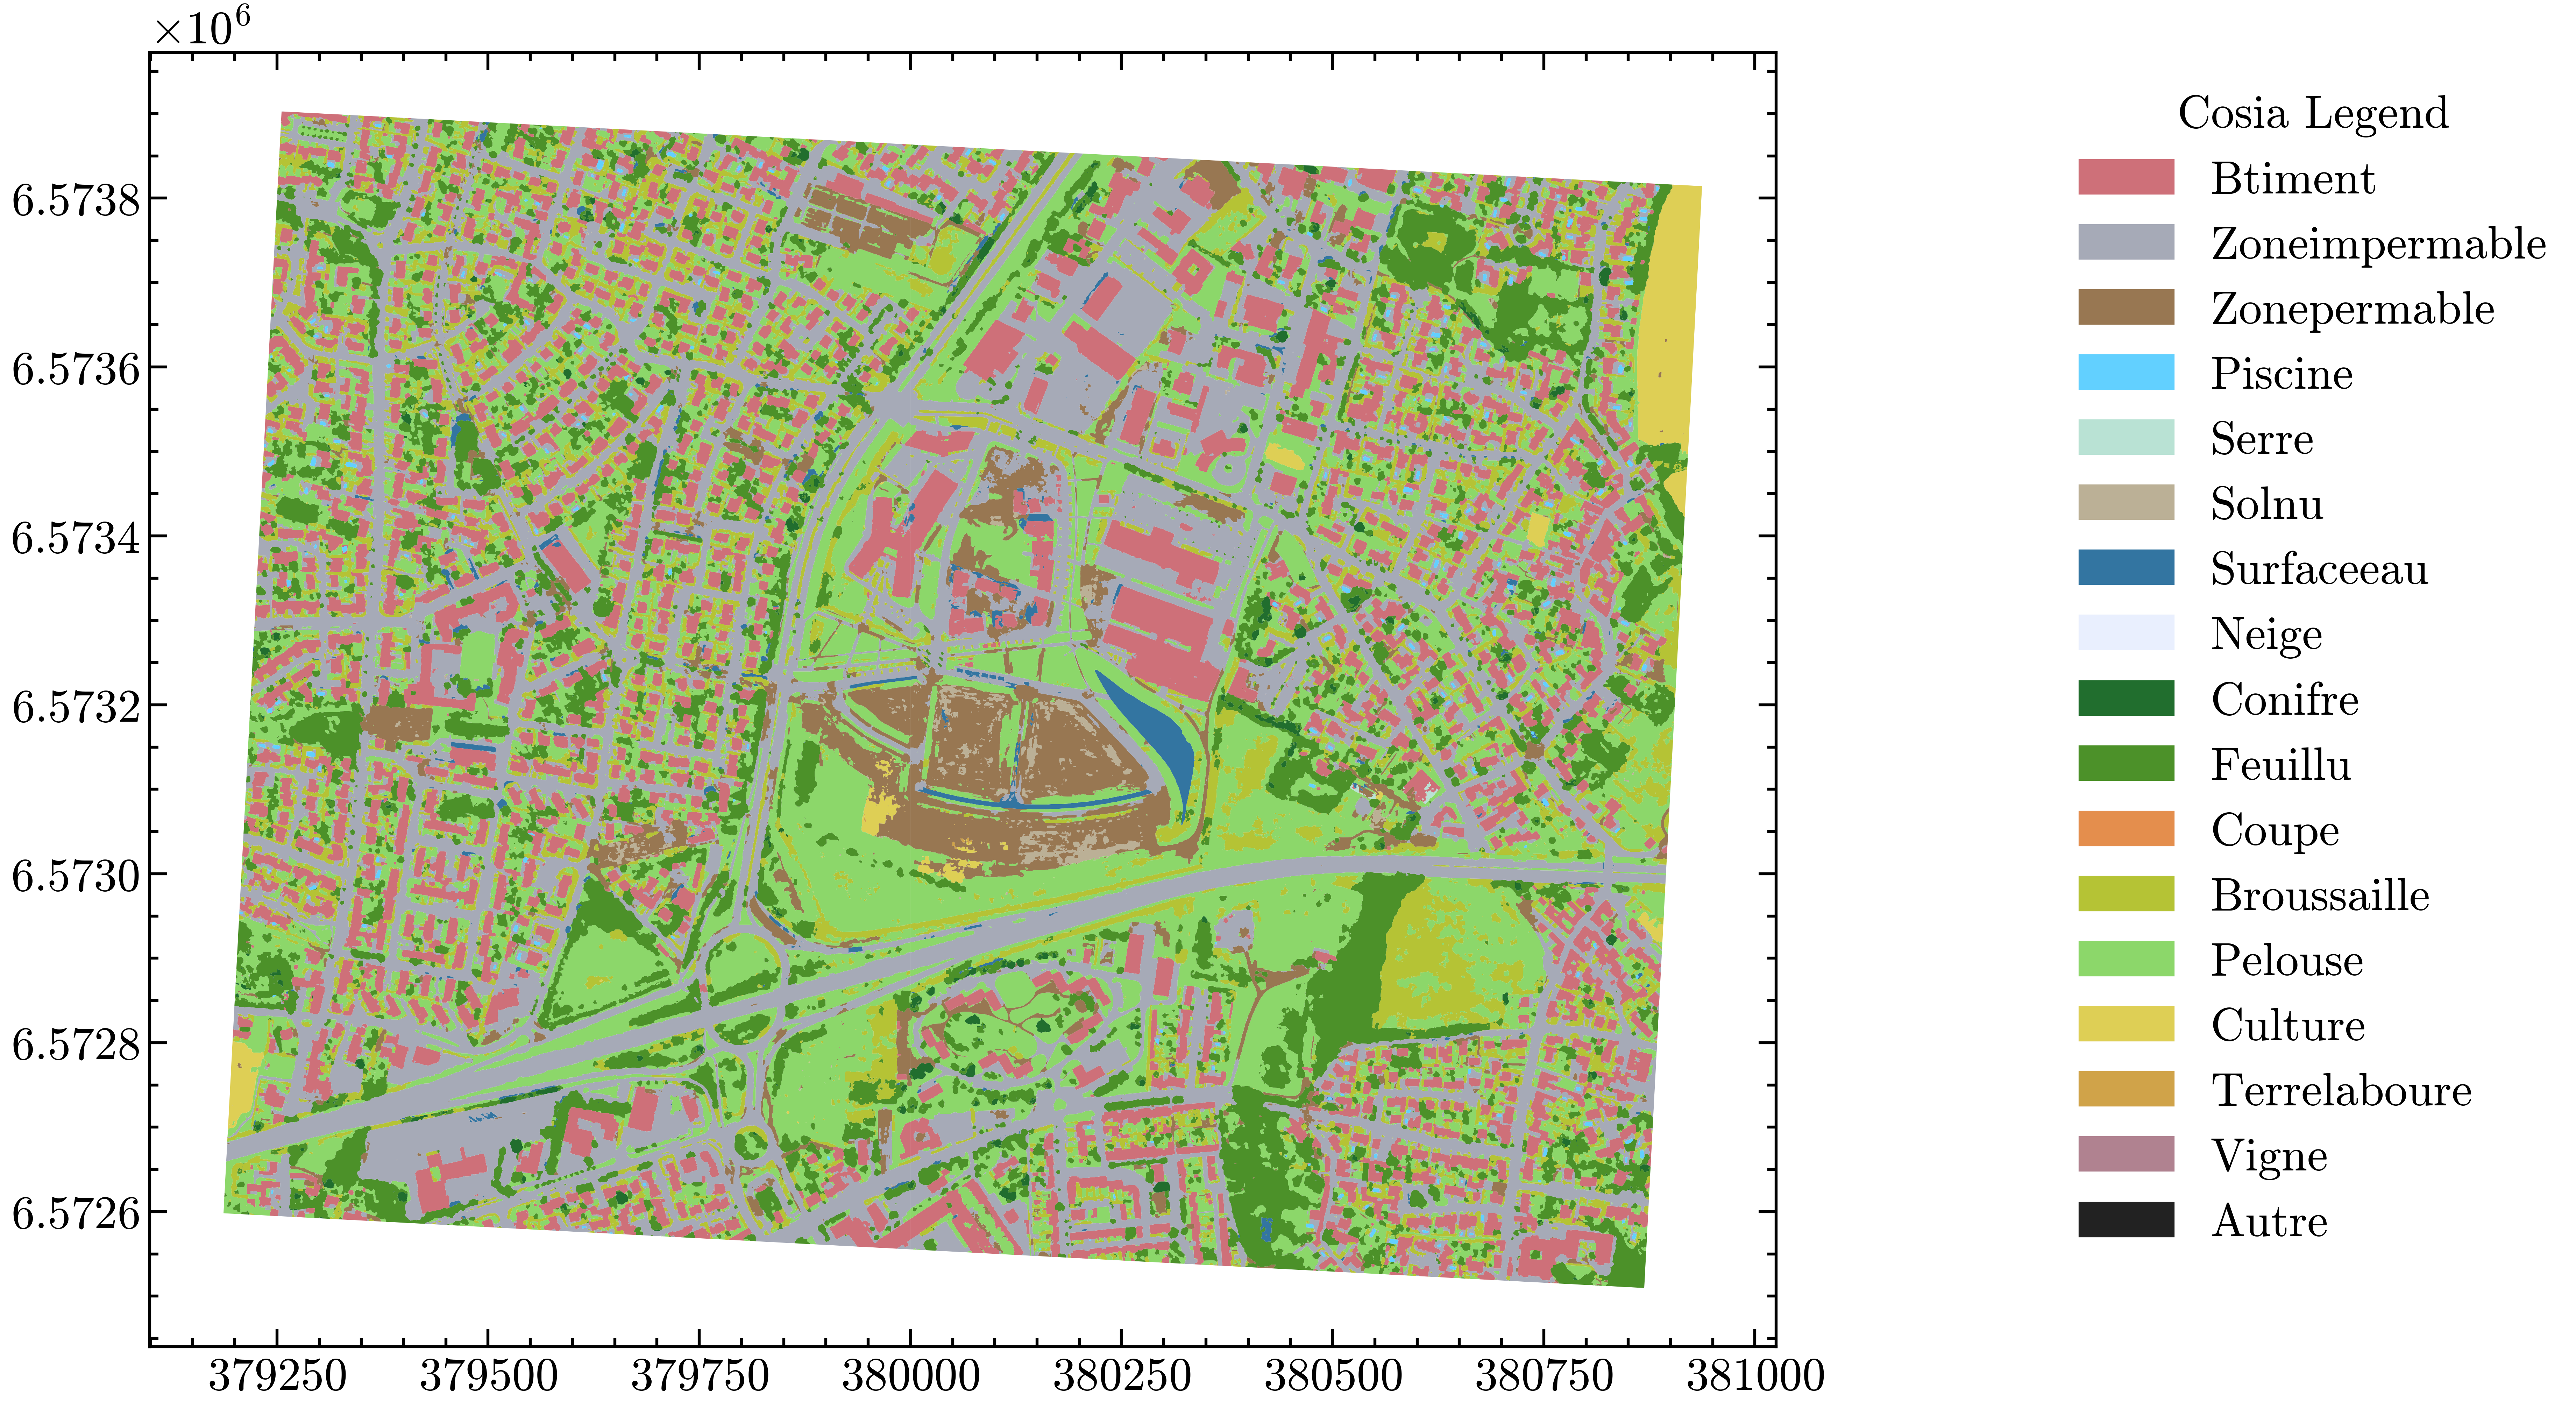

<Figure size 4800x3600 with 0 Axes>

In [54]:
import os
import re
import matplotlib.patches as mpatches
from pymdu.geometric.Lcz import Lcz
import matplotlib.pyplot as plt


# Définir la table de correspondance des couleurs et descriptions
table_color_cosia = {"Bâtiment" : "#ce7079",
"Zone imperméable" :"#a6aab7",
"Zone perméable":"#987752",
"Piscine":"#62d0ff",
"Serre":"#b9e2d4",
"Sol nu":"#bbb096",
"Surface eau":"#3375a1",
"Neige":"#e9effe",
"Conifère":"#216e2e",
"Feuillu":"#4c9129",
"Coupe": "#e48e4d",
"Broussaille":"#b5c335",
"Pelouse": "#8cd76a",
"Culture":"#decf55",
"Terre labourée":"#d0a349",
"Vigne":"#b08290",
"Autre":"#222222"}

# Tracer le GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))
cosia.plot(ax=ax, edgecolor=None, color=cosia['color'])
def supprimer_caracteres_speciaux(chaine):
    # Utilise une expression régulière pour supprimer tout ce qui n'est pas un caractère alphanumérique
    return re.sub(r'[^a-zA-Z0-9]', '', chaine)
# Créer les patches pour chaque couleur et sa description dans la légende
patches = [mpatches.Patch(color=value, label=supprimer_caracteres_speciaux(label)) for (value, label) in zip(table_color_cosia.values(),
                                                                        table_color_cosia.keys())]

# Ajouter la légende personnalisée
plt.legend(handles=patches, loc='upper right', title='Cosia Legend',bbox_to_anchor = (1.5,1.))


# Afficher la carte avec la légende
plt.show()

# Sauvegarder l'image
plt.savefig("cosia.png", format="png", dpi=199)


In [ ]:
cosia

## Les LCZ

Index(['Service', 'Thï¿½matique', 'Producteur', 'Nom',
       'URL d'acces Geoportail', 'URL d'acces Geoplateforme',
       'Statut de licence', 'Etat de publication', 'Statut  Gï¿½oplateforme',
       'Date actualisation de la donnï¿½e', 'Remarque'],
      dtype='object')


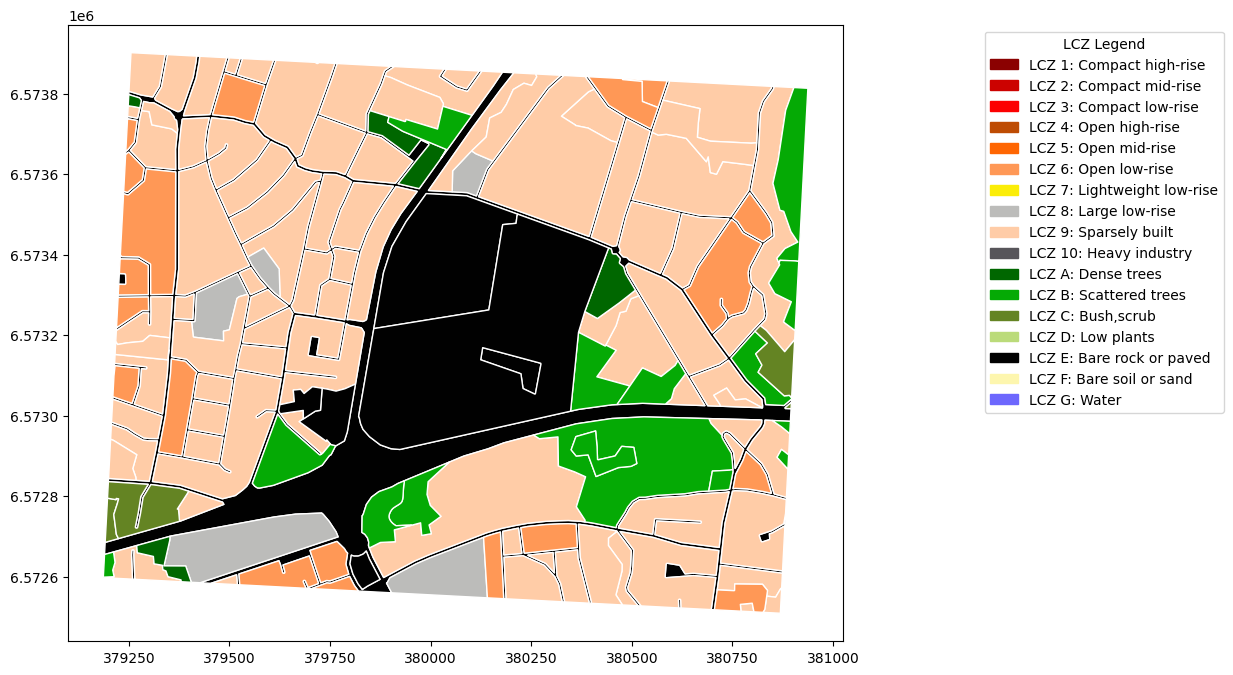

<Figure size 640x480 with 0 Axes>

In [6]:
import os
import matplotlib.patches as mpatches
from pymdu.geometric.Lcz import Lcz
import matplotlib.pyplot as plt

# Créer l'objet LCZ et générer le GeoDataFrame
lcz = Lcz()
lcz.bbox = [-1.160563, 46.17713, -1.138726, 46.188893]
lcz_gdf = lcz.run().to_gdf()

# Définir la table de correspondance des couleurs et descriptions
table_color = {
    1: ['LCZ 1: Compact high-rise', '#8b0101'],
    2: ['LCZ 2: Compact mid-rise', '#cc0200'],
    3: ['LCZ 3: Compact low-rise', '#fc0001'],
    4: ['LCZ 4: Open high-rise', '#be4c03'],
    5: ['LCZ 5: Open mid-rise', '#ff6602'],
    6: ['LCZ 6: Open low-rise', '#ff9856'],
    7: ['LCZ 7: Lightweight low-rise', '#fbed08'],
    8: ['LCZ 8: Large low-rise', '#bcbcba'],
    9: ['LCZ 9: Sparsely built', '#ffcca7'],
    10: ['LCZ 10: Heavy industry', '#57555a'],
    11: ['LCZ A: Dense trees', '#006700'],
    12: ['LCZ B: Scattered trees', '#05aa05'],
    13: ['LCZ C: Bush,scrub', '#648423'],
    14: ['LCZ D: Low plants', '#bbdb7a'],
    15: ['LCZ E: Bare rock or paved', '#010101'],
    16: ['LCZ F: Bare soil or sand', '#fdf6ae'],
    17: ['LCZ G: Water', '#6d67fd']
}

# Tracer le GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))
lcz_gdf.plot(ax=ax, edgecolor='w', color=lcz_gdf['color'])
# Créer les patches pour chaque couleur et sa description dans la légende
patches = [mpatches.Patch(color=info[1], label=info[0]) for info in table_color.values()]

# Ajouter la légende personnalisée
plt.legend(handles=patches, loc='upper right', title='LCZ Legend',bbox_to_anchor = (1.5,1.))


# Afficher la carte avec la légende
plt.show()

# Sauvegarder l'image
plt.savefig("gdf_lcz.png", format="png", dpi=199)
